In [ ]:
import numpy as np
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np 
import math 
from skimage.io import imread, imshow
import os

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path_data = '/content/gdrive/MyDrive/AprendizajeAutomatico/Proyecto4/dataset/'

In [ ]:
path_val_low  = path_data + 'val/low_res'
path_val_high = path_data + 'val/high_res'
path_test_low = path_data + 'train/low_res'
path_test_high= path_data + 'train/high_res'
#path_raw_low  = path_data + 'RawData/low_res'
#path_raw_high = path_data + 'RawData/high_res'

In [ ]:
import random
val_datos = 170
train_datos = 1370
n_test = int(val_datos*0.30)
#test_list1 = random.sample(range(val_datos), n_test)
#val_list1 = random.sample(range(val_datos), n_test)
random_list = random.sample(range(val_datos), val_datos)
test_list_h = random_list[:n_test]
val_list_h = random_list[n_test:]
test_list_l = list(map(lambda x: x + val_datos, test_list_h))
val_list_l = list(map(lambda x: x + val_datos, val_list_h))

In [ ]:
import functools 
print(len(random_list), len(test_list_h), len(val_list_h))
print(np.array(test_list_h).reshape(len(test_list_h)))
print(np.array(val_list_h).reshape(len(val_list_h)))
print(np.array(test_list_l).reshape(len(test_list_l)))
print(np.array(val_list_l).reshape(len(val_list_l)))

if functools.reduce(lambda x, y : x and y, map(lambda p, q: p == q,test_list_h,val_list_h), True): 
    print ("The lists l1 and l2 are the same") 
else: 
    print ("The lists l1 and l2 are not the same") 

if functools.reduce(lambda x, y : x and y, map(lambda p, q: p == q,test_list_l,val_list_l), True): 
    print ("The lists l1 and l2 are the same") 
else: 
    print ("The lists l1 and l2 are not the same") 

170 51 119
[ 73  91  67  59  24  66  52 169 113  54  14  33  97 140  57 120  19  30
  20  32  51  46 102  72  96 100  68  31 165  92 125  79 117   7 127 161
 153   2 112  26 129 146 118  22   0 105 124  29 152  48 109]
[ 94 151 150  41   3  18  44 158  47 134  34 164  12  13 133 115 132 123
 111  62  11  84  55 141 110  87  42 119   4  61 145  65   5  27  39  38
  28  82  99 168 103 138  23  83  58   9 101 155  88  16  77  21 106 142
  89 107 162 149   1 143 121 130  45 163 135 147  17  81 139  37  49 114
 126  74 137  80  43  71  15  53  60  70  95  64  75 148  40  63 131  93
  56   8  36  78 108 116 154  35  85  86 159  10 122 128 160 104  25 144
  76 167  69   6  98  90 166 157 156  50 136]
[243 261 237 229 194 236 222 339 283 224 184 203 267 310 227 290 189 200
 190 202 221 216 272 242 266 270 238 201 335 262 295 249 287 177 297 331
 323 172 282 196 299 316 288 192 170 275 294 199 322 218 279]
[264 321 320 211 173 188 214 328 217 304 204 334 182 183 303 285 302 293
 281 232 181 254

In [ ]:
path_val  = path_data + 'val/'
path_train = path_data + 'train/'
#path_raw  = path_data + 'RawData/'

In [ ]:
img_val = torchvision.datasets.ImageFolder(root=path_val, transform = transforms.ToTensor())
img_train = torchvision.datasets.ImageFolder(root=path_train, transform = transforms.ToTensor())

In [ ]:
print(img_val.classes)
print(img_train.classes)
print(len(img_val))
print(len(img_train))

['high_res', 'low_res']
['high_res', 'low_res']
340
1370


In [ ]:
x1,y1 = img_val[0]
x2,y2 = img_val[171]
print(y1,y2)

0 1


In [ ]:
import torch.utils.data as data_utils

#val_datos = 170
#train_datos = 1370

img_val_high = data_utils.Subset(img_val, val_list_h)
img_val_low = data_utils.Subset(img_val, val_list_l)

img_test_high = data_utils.Subset(img_val, test_list_h)
img_test_low = data_utils.Subset(img_val, test_list_l)

indices = torch.arange(0,int(train_datos/2 -1))
img_train_high = data_utils.Subset(img_train, indices)
indices = torch.arange(int(train_datos/2),train_datos -1)
img_train_low = data_utils.Subset(img_train, indices)

In [ ]:
def Show_imgs(imgs, name,  size = 3, color = True):
  color_m ='jet'
  if color == False:
    color_m ='gray'
  print('******************' + name  +  '**************************')
  img_numbers = imgs.shape[0]
  rows = cols = math.ceil(np.sqrt(img_numbers))
  
  fig = plt.figure(figsize=(rows*size, cols*size))
  
  for i in range(0, rows*cols):
    fig.add_subplot(rows, cols,i+1)
    if i<img_numbers:
      #plt.imshow(imgs[i].detach(), cmap = 'gray')
      plt.imshow(imgs[i].detach())
      #interpolation=NONE
  plt.show()

******************0**************************


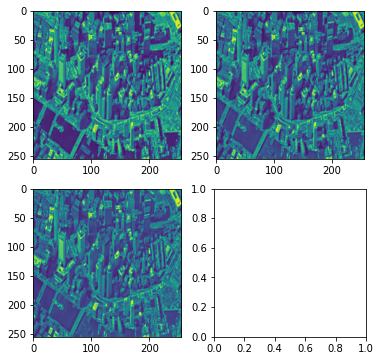

******************1**************************


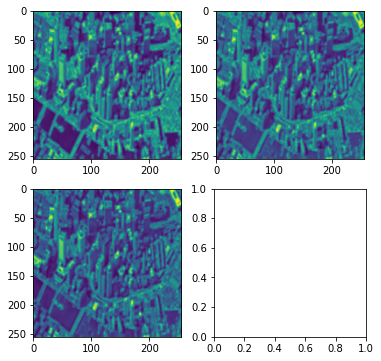

In [ ]:
img, label = img_val_high[16]
Show_imgs(img, str(label))
img, label = img_val_low[16]
Show_imgs(img, str(label))

******************0**************************


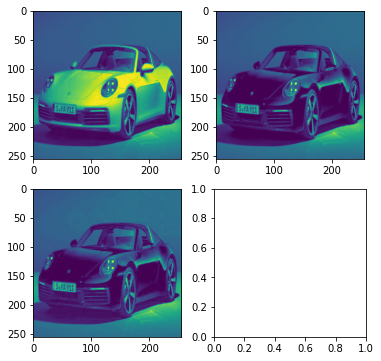

******************1**************************


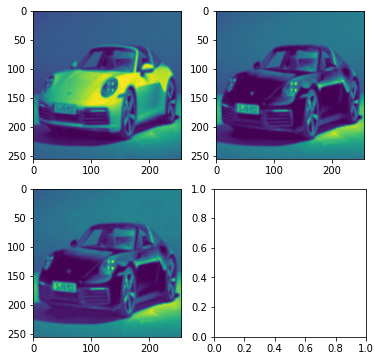

In [ ]:
img, label = img_test_high[16]
Show_imgs(img, str(label))
img, label = img_test_low[16]
Show_imgs(img, str(label))

******************0**************************


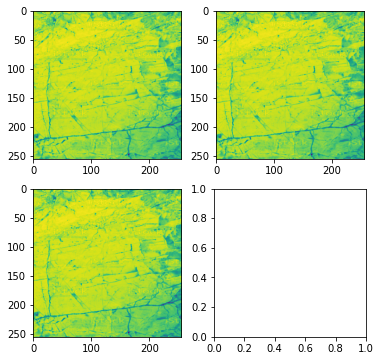

******************1**************************


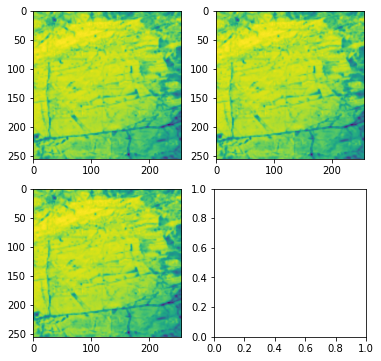

In [ ]:
img, label = img_train_high[16]
Show_imgs(img, str(label))
img, label = img_train_low[16]
Show_imgs(img, str(label))

In [ ]:
print(len(img_val_low))
print(len(img_val_high))
print(len(img_test_low))
print(len(img_test_high))
print(len(img_train_low))
print(len(img_train_high))

119
119
51
51
684
684


In [ ]:
img_val
#img_val_low

Dataset ImageFolder
    Number of datapoints: 340
    Root location: /content/gdrive/MyDrive/AprendizajeAutomatico/Proyecto4/dataset/val/
    StandardTransform
Transform: ToTensor()

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import math


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

batch_size = 64

img_transform = transform.Compose([transform.ToTensor(), transform.Normalize((0.5,),(0.5,))]) 

train_set = img_train
test_set = img_val

img, _ = train_set[0]
print(img.shape)

val_loader_lowres = torch.utils.data.DataLoader(dataset=img_val_low, batch_size=batch_size, shuffle=False)
val_loader_highres = torch.utils.data.DataLoader(dataset=img_val_high, batch_size=batch_size, shuffle=False)

test_loader_lowres = torch.utils.data.DataLoader(dataset=img_test_low, batch_size=batch_size, shuffle=False)
test_loader_highres = torch.utils.data.DataLoader(dataset=img_test_high, batch_size=batch_size, shuffle=False)

train_loader_lowres = torch.utils.data.DataLoader(dataset=img_train_low, batch_size=batch_size, shuffle=False)
train_loader_highres = torch.utils.data.DataLoader(dataset=img_train_high, batch_size=batch_size, shuffle=False)



cuda:0
torch.Size([3, 256, 256])


In [ ]:
train_loader_lowres

In [ ]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    #256x256
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=4, stride=2, padding=1)
    #128x128
    self.conv2 = nn.Conv2d(in_channels=64, out_channels=64*2, kernel_size=4, stride=2, padding=1)
    #64x64
    self.conv3 = nn.Conv2d(in_channels=64*2, out_channels=64*3, kernel_size=4, stride=2, padding=1)
    #32x32    
    self.conv4 = nn.Conv2d(in_channels=64*3, out_channels=64*4, kernel_size=4, stride=2, padding=1)
    #16x16

  def forward(self, image):
    capas = []
    out = F.relu(self.conv1(image))
    #print(out.size())
    capas.append(out)
    out = F.relu(self.conv2(out))
    capas.append(out)
    out = F.relu(self.conv3(out))
    capas.append(out)
    out = F.relu(self.conv4(out))
    z=out
    return z, capas

class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.convTran1 = nn.ConvTranspose2d(in_channels=4*64,out_channels=64*3, kernel_size=4, stride=2, padding=1)
    self.convTran2 = nn.ConvTranspose2d(in_channels=6*64,out_channels=64*2, kernel_size=4, stride=2, padding=1)
    self.convTran3 = nn.ConvTranspose2d(in_channels=4*64,out_channels=64, kernel_size=4, stride=2, padding=1)
    self.convTran4 = nn.ConvTranspose2d(in_channels=2*64,out_channels=3, kernel_size=4, stride=2, padding=1)
    
   
  def forward(self, latent, capas):
    out = F.relu(self.convTran1(latent))
    out_encoder = capas[2]
    out = torch.cat((out,out_encoder), dim=1)
    #print( out_encoder.size(), out.size())
    out = F.relu(self.convTran2(out))
    out_encoder = capas[1]
    out = torch.cat((out,out_encoder), dim=1)
    #print( out_encoder.size(), out.size())
    out = F.relu(self.convTran3(out))
    out_encoder = capas[0]
    out = torch.cat((out,out_encoder), dim=1)
    out = F.relu(self.convTran4(out))    
    return out


In [ ]:
class Autoencoder(nn.Module):
   def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

   def forward(self, x):
        latent, capas = self.encoder(x)
        x_recon = self.decoder(latent, capas)
        return  x_recon

In [ ]:
def validation(model, device, val_loader_lowres,val_loader_highres, loss_function):    
    model.eval()
    loss_total = 0    
    with torch.no_grad():
        #for i, (images, labels) in enumerate(val_loader):
        for item1, item2 in zip(val_loader_lowres, cycle(val_loader_highres)):
            images, _ = item1
            labels, _ = item2
            #inputs = images.float().to(device)
            #labels = labels.long().to(device)
            #outputs = model(inputs).float()
            inputs = images.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss_total += loss.item()
    return loss_total / len(val_loader_lowres)

In [ ]:
def psnr(label, outputs, max_val=1.):
    label = label.cpu().detach().numpy() 
    outputs = outputs.cpu().detach().numpy()
    img_diff = outputs - label
    rmse = math.sqrt(np.mean((img_diff) ** 2))
    if rmse == 0:
        return 100
    else:
        PSNR = 20 * math.log10(max_val / rmse)
        return PSNR

In [ ]:
from itertools import cycle

def train(model, train_loader_lowres, train_loader_highres, Epochs, loss_fn):
    ultimo_loss = 100
    umbral_loss = 3
    times = 0  
    train_loss_avg = []
    list_loss= []
    train_list=[]
    val_list=[] 
    train_psnr = []
    for epoch in range(Epochs):
      train_loss_avg.append(0)
      num_batches = 0
      train_loss = 0  
      running_psnr = 0.0
      for item1, item2 in zip(train_loader_lowres, cycle(train_loader_highres)):
          image_batch, _ = item1
          image_compare, _ = item2

          image_batch = image_batch.to(device)
          image_compare = image_compare.to(device)
          
          image_batch_recon = model(image_batch)
          loss = loss_fn(image_batch_recon, image_compare)
          
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          train_loss_avg[-1] += loss.item()
          num_batches += 1
          train_loss += loss.item()

          batch_psnr =  psnr(image_compare, image_batch_recon)
          running_psnr += batch_psnr


      train_list.append(train_loss/len(train_loader_lowres))
      loss_actual = validation(model, device, val_loader_lowres, val_loader_highres, loss_fn)
      val_list.append(loss_actual)

      final_psnr = running_psnr/int(len(train_loader_lowres))
      train_psnr.append(final_psnr)
          
      train_loss_avg[-1] /= num_batches
      print('PSNR [%d / %d] ratio high quality vs train outcome: %f' % (epoch+1, Epochs, train_psnr[-1]))
      print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, Epochs, train_loss_avg[-1]))
    print('Final de train con epochs')
    return train_list, val_list, train_psnr
    #return train_loss_avg

In [ ]:
capacity = 64
latent_dims = 10    
learning_rate = 0.001
autoencoder = Autoencoder()
autoencoder.to(device)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate, weight_decay=1e-5)

autoencoder.train()

#loss_result = train(autoencoder,train_loader,10,loss)
loss_train, loss_val, train_psnr = train(autoencoder,train_loader_lowres, train_loader_highres, 20, loss)

PSNR [1 / 20] ratio high quality vs train outcome: 9.683085
Epoch [1 / 20] average reconstruction error: 0.114406
PSNR [2 / 20] ratio high quality vs train outcome: 13.049369
Epoch [2 / 20] average reconstruction error: 0.051780
PSNR [3 / 20] ratio high quality vs train outcome: 17.376744
Epoch [3 / 20] average reconstruction error: 0.019978
PSNR [4 / 20] ratio high quality vs train outcome: 20.911191
Epoch [4 / 20] average reconstruction error: 0.008190
PSNR [5 / 20] ratio high quality vs train outcome: 22.643675
Epoch [5 / 20] average reconstruction error: 0.005462
PSNR [6 / 20] ratio high quality vs train outcome: 23.622017
Epoch [6 / 20] average reconstruction error: 0.004357
PSNR [7 / 20] ratio high quality vs train outcome: 24.397819
Epoch [7 / 20] average reconstruction error: 0.003643
PSNR [8 / 20] ratio high quality vs train outcome: 24.971525
Epoch [8 / 20] average reconstruction error: 0.003191
PSNR [9 / 20] ratio high quality vs train outcome: 25.426351
Epoch [9 / 20] avera

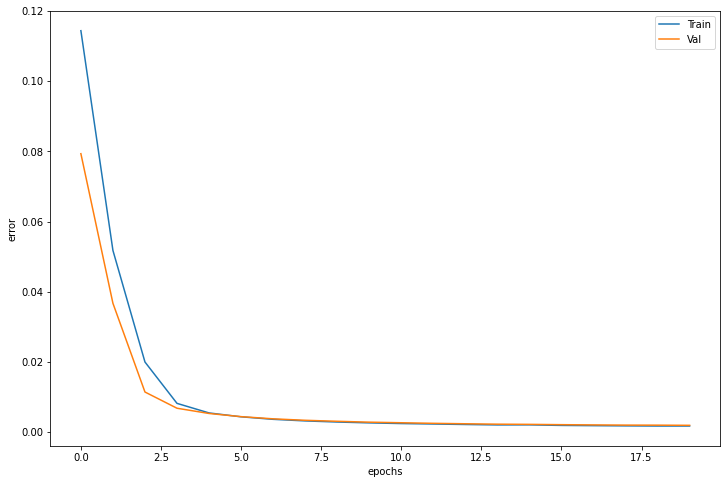

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
plt.plot(loss_train)
plt.plot(loss_val)
plt.xlabel("epochs")
plt.ylabel("error")
plt.legend(["Train", "Val"], loc ="upper right")
plt.show()

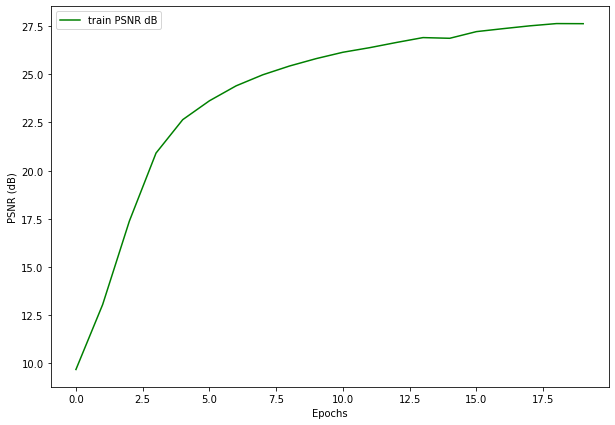

In [ ]:
# psnr plots
plt.figure(figsize=(10, 7))
plt.plot(train_psnr, color='green', label='train PSNR dB')
plt.xlabel('Epochs')
plt.ylabel('PSNR (dB)')
plt.legend()
plt.show()

In [ ]:
def Show(out, title = ''):
  print(title)
  out = out.permute(1,0,2,3)
  grilla = torchvision.utils.make_grid(out,10,5)
  plt.imshow(transforms.ToPILImage()(grilla), 'jet')
  plt.show()

def Show_Weight(out):
  grilla = torchvision.utils.make_grid(out)
  plt.imshow(transform.ToPILImage()(grilla), 'jet')
  plt.show()

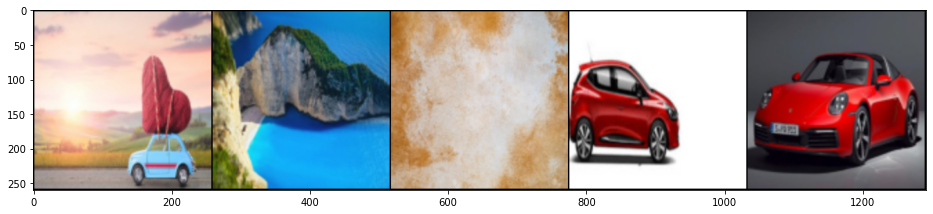

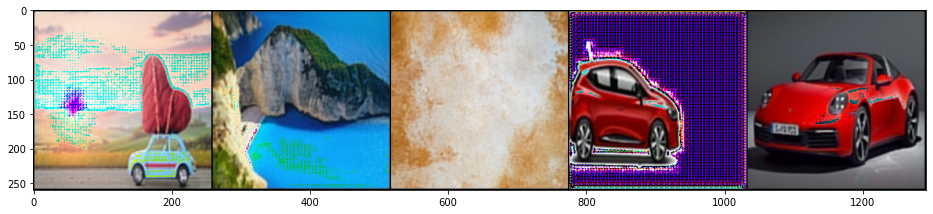

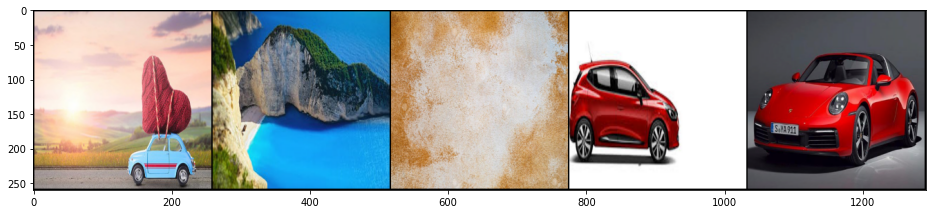

In [ ]:
autoencoder.eval()


tensor = torch.zeros(len(test_loader_lowres),10)


with torch.no_grad():

  #image,label = iter(test_loader).next()
  #image,label = iter(test_loader).next()
  image,label = iter(test_loader_lowres).next()
  image1,label1 = iter(test_loader_highres).next()
  image = image.to(device)
  z,capas = autoencoder.encoder(image)
  z = z.to('cpu')
  z1=z.to(device)
  decodificado = autoencoder.decoder(z1, capas)
 
  orig_psnr = psnr(image1, image)
  pred_psnr = psnr(image1, decodificado)

  decodificado = decodificado.to('cpu')

  fig, ax = plt.subplots(figsize=(16, 16))
  Show_Weight(image[12:17])
  fig, ax = plt.subplots(figsize=(16, 16))
  Show_Weight(decodificado[12:17])
  fig, ax = plt.subplots(figsize=(16, 16))
  Show_Weight(image1[12:17])
  plt.show()

In [ ]:
print("PSNR ratio high quality vs low quality: %f" % orig_psnr)
print("PSNR ratio high quality vs test outcome: %f" % pred_psnr)

PSNR ratio high quality vs low quality: 28.333131
PSNR ratio high quality vs test outcome: 28.253135
